Using a Random Forest Regressor now, getting a **much** better accuracy score. See below.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
print(check_output(["ls", "../input"]).decode("utf8"))

data.csv



In [2]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [3]:
df = pd.read_csv("../input/data.csv")
# Drop columns
df = df.drop("date", axis=1)
# center timestamp
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))
# one hot encode categorical columns
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head(10)

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,46,21618,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,43,22808,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,53,23409,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,54,24014,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,43,24615,0,0,72.15,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
# Extract the training and test data
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

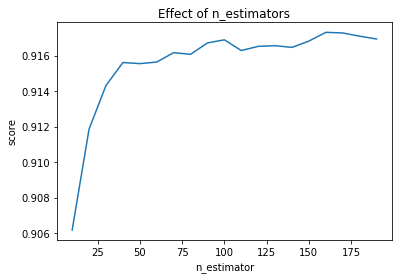

In [7]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [8]:
scores

[0.90618208488816254,
 0.91186940116585991,
 0.91432183471350792,
 0.91561538330834424,
 0.91555406832670805,
 0.91564254900108932,
 0.91617072576747871,
 0.91607852422314018,
 0.91671988820744388,
 0.91689415865393931,
 0.91629269755239562,
 0.91652525237739257,
 0.91656536575405589,
 0.91646841560383641,
 0.91682396126035637,
 0.91731642065093733,
 0.91728165156365638,
 0.9170992552043058,
 0.91694251907622615]